## Figure Generation Notebook
The role of this notebook is two-fold:
- Double check and print basic information on the pickled result from the analysis
- Generate the raw figure to be stiched together in BioRender

Make sure that you transfered the right files from the cluster onto your laptop using Globus file transfer.

In [1]:
import pickle

import pandas as pd
import numpy as np

from utils import load_pickle, find_best_model

# Path Initiatilization
PICKLE_PATH = "/home/yacine/Documents/BIAPT/AEC vs wPLI data/"
RESULT_PATH = "/home/yacine/Documents/BIAPT/AEC vs wPLI Result/"

# Experiment Variables Initialization
EPOCHS = ["emf5", "eml5"]
GRAPHS = ["aec", "pli"]
FEATURES = ["func"]

for epoch in EPOCHS:
    for graph in GRAPHS:

        # Load the classifier result
        clf_path = f"{PICKLE_PATH}best_clf_{graph}_{epoch}_func.pickle"
        clf_result = load_pickle(clf_path)
        
        # Pretty Print the Result
        print(f"Classifier Result for {epoch} at {graph}")
        accuracies = clf_result['accuracies']
        
        for idx, accuracy in enumerate(accuracies):
            print(f"Participant #{idx} accuracy: {accuracy}")
        print(f"Mean Accuracy : {np.mean(accuracies)}")
        
        
        conf_matrices = clf_result['cms']
        
        print("Classifier Parameter count: ")
        best_clf = find_best_model(clf_result['best_params'])

Classifier Result for emf5 at aec
Participant #0 accuracy: 0.5652173913043478
Participant #1 accuracy: 0.7142857142857143
Participant #2 accuracy: 0.3784722222222222
Participant #3 accuracy: 0.7522123893805309
Participant #4 accuracy: 0.6821305841924399
Participant #5 accuracy: 0.8913043478260869
Participant #6 accuracy: 0.8519793459552496
Participant #7 accuracy: 0.6067415730337079
Participant #8 accuracy: 0.7628865979381443
Mean Accuracy : 0.689470018459827
Classifier Parameter count: 
log_1.0 : 4
svc_0.1 : 2
lda_svd : 2
svc_0.4 : 1
Classifier Result for emf5 at pli
Participant #0 accuracy: 0.5652173913043478
Participant #1 accuracy: 0.6254355400696864
Participant #2 accuracy: 0.3784722222222222
Participant #3 accuracy: 0.7522123893805309
Participant #4 accuracy: 0.6821305841924399
Participant #5 accuracy: 0.8913043478260869
Participant #6 accuracy: 0.8519793459552496
Participant #7 accuracy: 0.6086142322097379
Participant #8 accuracy: 0.7628865979381443
Mean Accuracy : 0.67980585012

/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when using version 0.23.1. This might lead to 

In [1]:
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_pickle

IN_DIR = "/home/yacine/Documents/BIAPT/AEC vs wPLI data/"
OUT_DIR = f"/home/yacine/Documents/BIAPT/AEC vs wPLI Result/"

EPOCHS = ["emf5" "eml5"]
GRAPHS = ["aec" "pli"]
FEATURES = ["func"]

def save_figure(fig_name, dpi=500):
    """ Helper to save the figure with the right fig_name and the right dpi"""
    fig = plt.gcf()
    plt.show()
    fig.set_size_inches((8, 8), forward=False)
    fig.savefig(fig_name, dpi=dpi)

In [2]:
# We want to make the violin plot of the distribution between the binary and weighted graph for aec and pli

dark_purple = (0.28645868165429034, 0.17570375961380752, 0.3440754090644915) # used for weighted
light_purple = (0.6196337473419887, 0.3684648209452393, 0.5405540573846532) # used for binary
beige = (0.8454263141680334, 0.6225806657605325, 0.6651572981499156) # used for functional connectivity only

for graph in ['aec', 'pli']:
    data = {
        'Accuracy': [],
        'Graph Type': [],
        'Condition': []
    }
    for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
        bin_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_bin.pickle")
        wei_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_wei.pickle")

        # I need to first take the data and put it in a dataframe
        bin_label = ['binarized' for x in bin_bootstrap['distribution']]
        wei_label = ['weighted' for x in wei_bootstrap['distribution']]
        condition = [cur_condition for x in wei_bootstrap['distribution']]*2

        data['Accuracy'] = data['Accuracy'] + bin_bootstrap['distribution'] + wei_bootstrap['distribution']
        data['Graph Type'] = data['Graph Type'] + bin_label + wei_label
        data['Condition'] = data['Condition'] + condition
        
        print(epoch, cur_condition, " BIN: ", str(np.mean(bin_bootstrap['distribution'])), " WEI:", str(np.mean(wei_bootstrap['distribution'])))

    colors = [light_purple, dark_purple]# Set your custom color palette
    sns.set_context("poster")
    sns.set_palette(sns.color_palette(colors))
    sns.set_style("whitegrid",{'axes.grid' : False})
    df = pd.DataFrame (data, columns = ['Accuracy','Graph Type', "Condition"])
    ax = sns.violinplot(data=df, x='Condition', y='Accuracy', hue="Graph Type")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set(xticklabels=[])
    ax.legend_.remove()
    ax.set_ylim(0.40, 0.75)
    
    save_figure(f"{OUT_DIR}{graph}_bin_vs_wei.png")


FileNotFoundError: [Errno 2] No such file or directory: '/home/yacine/Documents/BIAPT/AEC vs wPLI data//bootstrap_aec_emf5_bin.pickle'

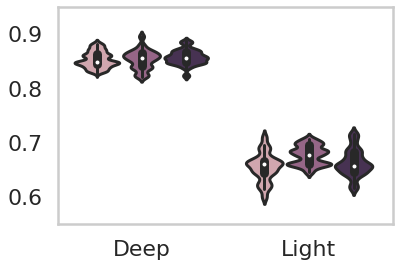

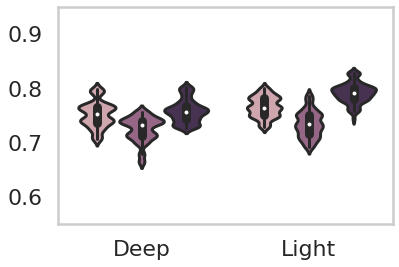

In [5]:
# Generate the violin plot for all func bootstrap
# TODO: I'm missing func-bin
for graph in ['aec', 'pli']:
    data = {
        'Accuracy': [],
        'Graph Type': [],
        'Condition': []
    }
    
    for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
        func_bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func.pickle")
        bin_bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func-bin.pickle")
        wei_bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func-wei.pickle")

        # I need to first take the data and put it in a dataframe
        func_label = ['func' for x in func_bootstrap['distribution']]
        bin_label = ['func + bin' for x in bin_bootstrap['distribution']]
        wei_label = ['func + wei' for x in wei_bootstrap['distribution']]
        condition = [cur_condition for x in wei_bootstrap['distribution']]*3

        data['Accuracy'] = data['Accuracy'] + func_bootstrap['distribution'] + bin_bootstrap['distribution'] + wei_bootstrap['distribution']
        data['Graph Type'] = data['Graph Type'] + func_label + bin_label + wei_label
        data['Condition'] = data['Condition'] + condition

    colors = [beige, light_purple, dark_purple]# Set your custom color palette
    sns.set_context("poster")
    sns.set_palette(sns.color_palette(colors))
    sns.set_style("whitegrid",{'axes.grid' : False})
    df = pd.DataFrame (data, columns = ['Accuracy','Graph Type', "Condition"])
    ax = sns.violinplot(data=df, x='Condition', y='Accuracy', hue="Graph Type")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend_.remove()
    ax.set_ylim(0.55, 0.95)
    save_figure(f"{OUT_DIR}{graph}_func_vs_bin_vs_wei.png")

emf5 aec func:  0.8581032400383503  WEI: 0.855296872445069
emf5 pli func:  0.7891418083311031  WEI: 0.7901247331085686
eml5 aec func:  0.6834615652960708  WEI: 0.6817541310385911
eml5 pli func:  0.781152686197323  WEI: 0.8104440213577486


/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


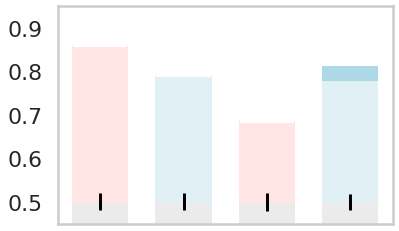

Random:
[0.5006588125317554, 0.5006815448770335, 0.5003846923931071, 0.5000886024214355]
Accuracies
[0.6434782608695652, 0.8695652173913043, 0.6086956521739131, 0.9203539823008849, 0.6724137931034483, 0.9504950495049505, 0.8879310344827587, 0.5981308411214953, 0.8793103448275862]
[0.7217391304347827, 0.8869565217391304, 0.6347826086956522, 0.911504424778761, 0.7931034482758621, 0.9603960396039604, 0.8620689655172413, 0.6355140186915887, 0.8879310344827587]
0.019306917494598366
[0, 0.0009829247774654215, 0, 0.02929133516042559]


In [6]:
# Make the stacked bar plot for the deep and ligh for random with and without func-wei (three way stacked)
# Will do it for deep and aec

# Colors
random_color = "#ebebeb"
aec_color = "#ffe6e5"
aec_improvement_color = "#ffcccb"
pli_color = "#e0f0f5"
pli_improvement_color = "#add8e6"

random_acc = []
func_acc = []
wei_acc = []
y_err = []
for epoch in ['emf5', 'eml5']:
    for graph in ['aec', 'pli']:
        permutations = load_pickle(f"{IN_DIR}permutation_{graph}_{epoch}_func.pickle")
        func_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        wei_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func-wei.pickle")    
        
        # Next up we will do a comparison plot of each permutation tests iteration
        random_acc = random_acc + [np.mean(permutations)]
        func_acc = func_acc + [np.mean(func_clf['accuracies']) - np.mean(permutations)]
        wei_acc = wei_acc + [np.mean(wei_clf['accuracies']) - (np.mean(func_clf['accuracies']))]

        y_err = y_err + [np.std(permutations)]
        
        print(epoch, graph, "func: ", str(np.mean(func_clf['accuracies'])), " WEI:", str(np.mean(wei_clf['accuracies'])))

        
ind = np.arange(4)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

sum_list = []
for (func, rand) in zip(func_acc, random_acc):
    sum_list.append(func+rand)
    
fix_wei_acc = []
for wei in wei_acc:
    
    if wei < 0:
        wei = 0
    fix_wei_acc.append(wei)

p1 = plt.bar(ind, random_acc, width, yerr=y_err)
p2 = plt.bar(ind, func_acc, width, bottom=random_acc)
p3 = plt.bar(ind, fix_wei_acc, width, bottom=sum_list)



#plt.xticks(ind, ('Healthy', 'MSK', 'Both'))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim((0.45, 0.95))
plt.xticks([])


# Setting up the colors
[p1[i].set_color(random_color) for i in range(4)]
p2[0].set_color(aec_color)
p2[1].set_color(pli_color)
p2[2].set_color(aec_color)
p2[3].set_color(pli_color)


p3[3].set_color(pli_improvement_color)

save_figure(f"{OUT_DIR}improvement_by_wei.png")

print("Random:")
print(random_acc)
print("Accuracies")
print(func_clf['accuracies'])
print(wei_clf['accuracies'])
print(np.std(permutations))
print(fix_wei_acc)

[0.017391304347826098, 0.034782608695652195, -0.060869565217391286, 0.0, 0.025862068965517238, 0.01980198019801982, -0.017241379310344862, -0.036363636363636376, -0.008620689655172487]
[0.06956521739130428, 0.0, 0.05217391304347829, -0.053097345132743334, 0.051724137931034475, 0.02970297029702973, -0.0431034482758621, -0.0636363636363636, -0.034482758620689724]
[-0.008695652173913104, -0.008695652173912993, 0.034782608695652195, 0.008849557522123908, 0.025862068965517238, 0.03960396039603964, -0.008620689655172376, -0.04672897196261683, -0.051724137931034475]
[0.0782608695652175, 0.017391304347826098, 0.02608695652173909, -0.008849557522123908, 0.12068965517241381, 0.00990099009900991, -0.02586206896551735, 0.03738317757009346, 0.008620689655172487]
emf5+aec emf5+pli eml5+aec eml5+pli


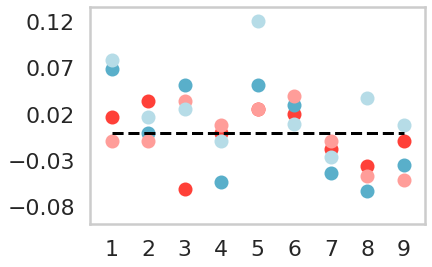

In [7]:
# In this one we want to reproduce the accuracy improvement for each participant given by weighted features
flatui = ["#ff4038", "#59afca",  "#ff9d99", "#b6dce7"]
wei_improvements = []
index = 0
for epoch in ['emf5', 'eml5']:
    for graph in ['aec', 'pli']:
        wei_improvement = []
        func_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        wei_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func-wei.pickle")
        
        for func, wei in zip(func_clf['accuracies'], wei_clf['accuracies']):
            wei_improvement.append(wei-func)
        
        print(wei_improvement)
        print("======")
        plt.scatter([1,2,3,4,5,6,7,8,9], wei_improvement, color=flatui[index])
        index = index + 1
        wei_improvements.append(wei_improvement)

plt.plot([1,2,3,4,5,6,7,8,9], [0,0,0,0,0,0,0,0,0], 'k--')
plt.yticks(np.arange(-0.08, 0.15, 0.05))
plt.xticks(np.arange(1,10,1))
print("emf5+aec", "emf5+pli", "eml5+aec", "eml5+pli")
save_figure(f"{OUT_DIR}participant_improvement_by_wei.png")

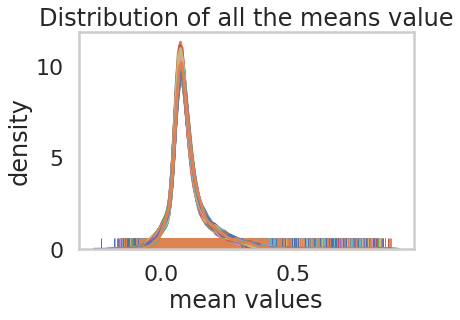

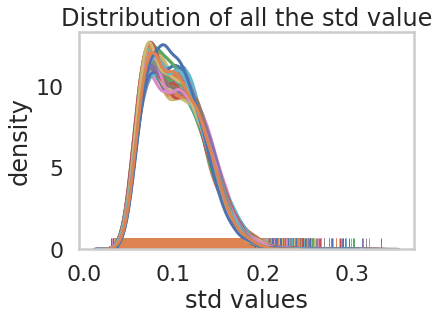

In [8]:
# here the goal is to plot the distribution of each feature
# This will be a bit difficult since we do have a lot of feature, but we can group them together

sns.set_palette(sns.color_palette("deep", 82))


# distribution of all the 82 means
df = pd.read_csv(f"{IN_DIR}features.csv")

for id in range(1,83):
    values = df[f"mean_{id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("mean values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the means value")
save_figure(f"{OUT_DIR}means_distribution.png")

# distribution of all the 82 std
for id in range(1,83):
    values = df[f"std_{id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("std values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the std value")
save_figure(f"{OUT_DIR}std_distribution.png")

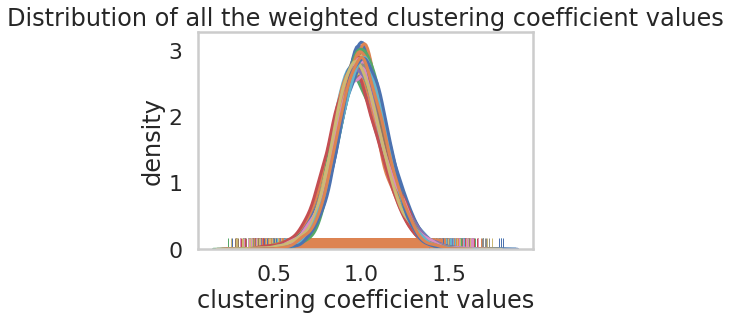

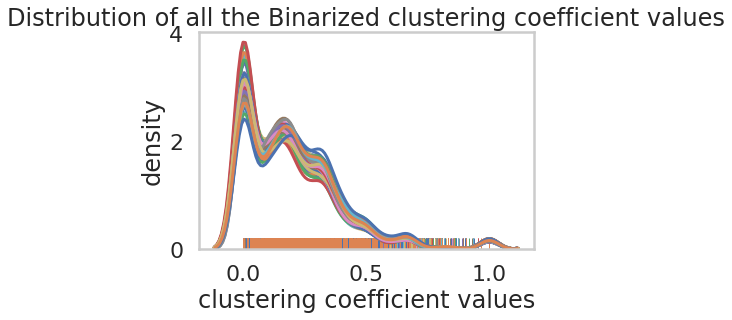

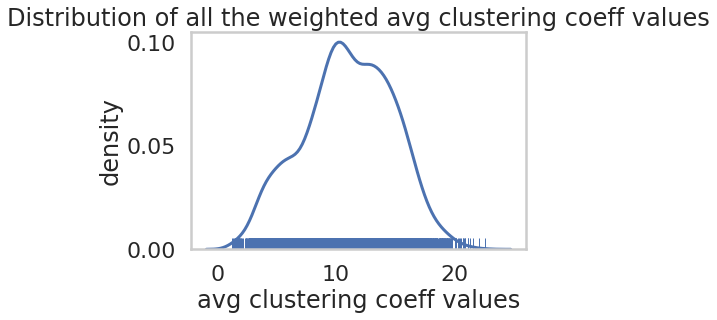

In [35]:
# distribution of all the 82 clustering coefficient weighted
for id in range(1,83):
    values = df[f"wei_clust_coeff_ {id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("clustering coefficient values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted clustering coefficient values")
save_figure(f"{OUT_DIR}wei_clust_coeff_distribution.png")

# distribution of all the 82 clustering coefficient binarized
for id in range(1,83):
    values = df[f"bin_clust_coeff_ {id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("clustering coefficient values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the Binarized clustering coefficient values")
save_figure(f"{OUT_DIR}bin_clust_coeff_distribution.png")

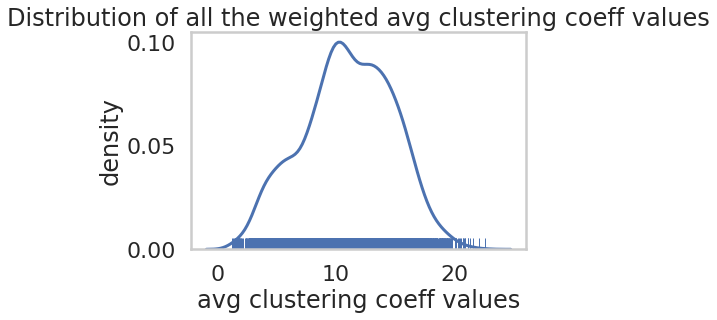

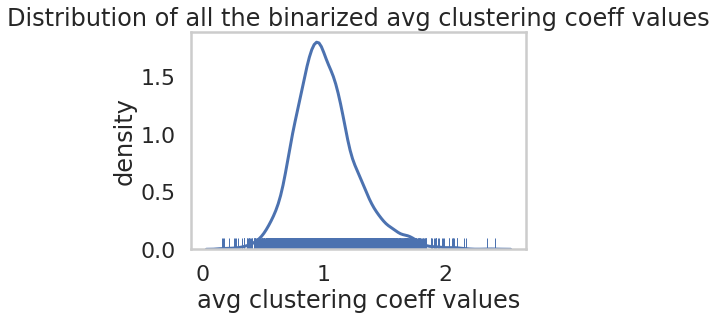

In [36]:
# distribution of all the avg norm clust coeff efficiency
values = df[f"wei_norm_avg_clust_coeff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("avg clustering coeff values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted avg clustering coeff values")
save_figure(f"{OUT_DIR}wei_norm_avg_clust_coeff_distribution.png")

values = df[f"bin_norm_avg_clust_coeff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("avg clustering coeff values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binarized avg clustering coeff values")
save_figure(f"{OUT_DIR}bin_norm_avg_clust_coeff_distribution.png")


# distribution of the community
# distribution of global efficiency: []_norm_g_eff
# distribution of the small worldness



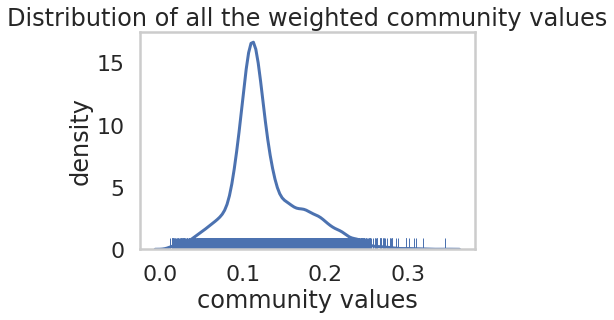

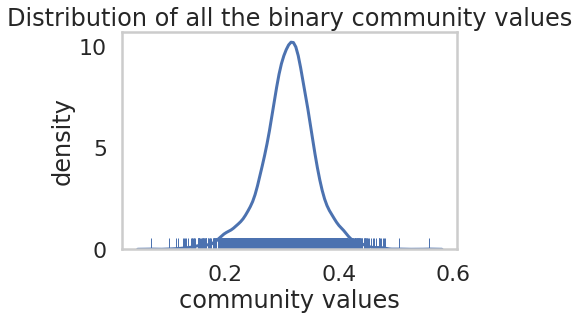

In [42]:
# distribution of the community
values = df[f"wei_community"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("community values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted community values")
save_figure(f"{OUT_DIR}wei_community_distribution.png")

values = df[f"bin_community"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("community values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binary community values")
save_figure(f"{OUT_DIR}bin_community_distribution.png")

# distribution of global efficiency: []_norm_g_eff
# distribution of the small worldness


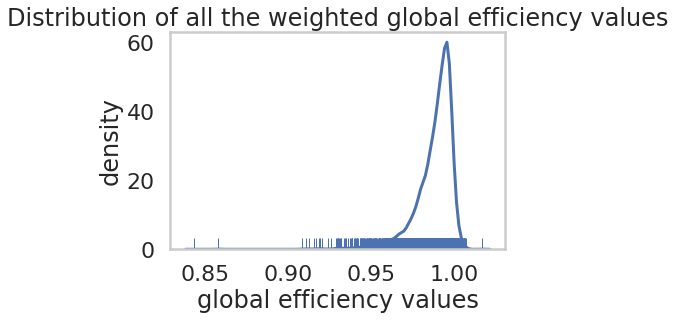

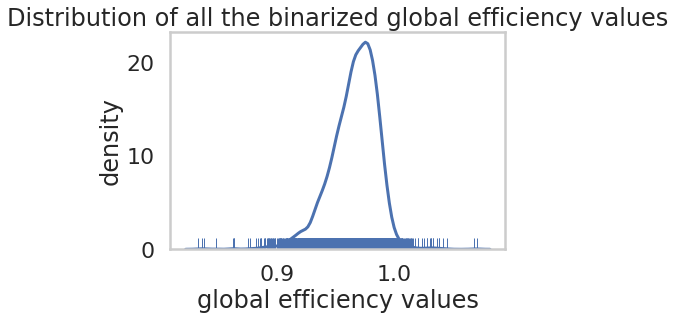

In [43]:
# distribution of global efficiency: []_norm_g_eff
values = df[f"wei_norm_g_eff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("global efficiency values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted global efficiency values")
save_figure(f"{OUT_DIR}wei_g_eff.png")

values = df[f"bin_norm_g_eff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("global efficiency values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binarized global efficiency values")
save_figure(f"{OUT_DIR}bin_g_eff.png")

# distribution of the small worldness

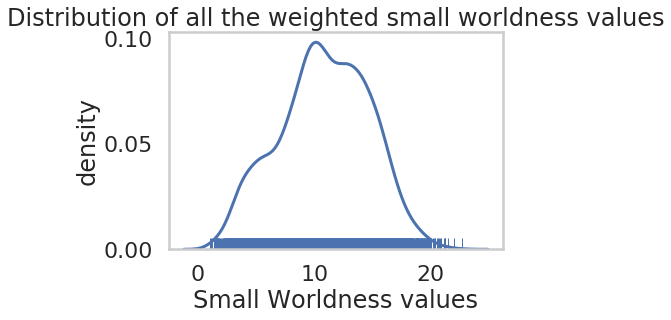

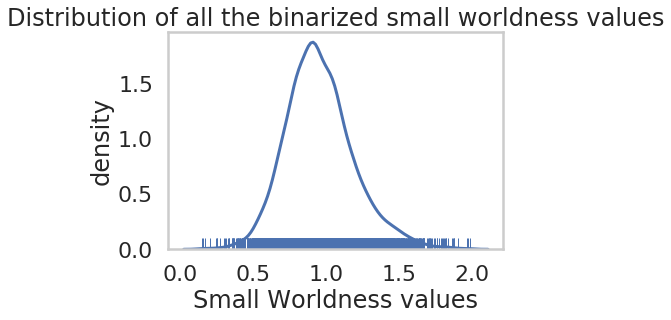

In [44]:
# distribution of the small worldness
values = df[f"wei_small_worldness"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("Small Worldness values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted small worldness values")
save_figure(f"{OUT_DIR}wei_small_worldness.png")

values = df[f"bin_small_worldness"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("Small Worldness values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binarized small worldness values")
save_figure(f"{OUT_DIR}bin_small_worldness.png")

In [31]:
for column in df.columns:
    print(column)

p_id
frequency
epoch
graph
window
mean_1
mean_2
mean_3
mean_4
mean_5
mean_6
mean_7
mean_8
mean_9
mean_10
mean_11
mean_12
mean_13
mean_14
mean_15
mean_16
mean_17
mean_18
mean_19
mean_20
mean_21
mean_22
mean_23
mean_24
mean_25
mean_26
mean_27
mean_28
mean_29
mean_30
mean_31
mean_32
mean_33
mean_34
mean_35
mean_36
mean_37
mean_38
mean_39
mean_40
mean_41
mean_42
mean_43
mean_44
mean_45
mean_46
mean_47
mean_48
mean_49
mean_50
mean_51
mean_52
mean_53
mean_54
mean_55
mean_56
mean_57
mean_58
mean_59
mean_60
mean_61
mean_62
mean_63
mean_64
mean_65
mean_66
mean_67
mean_68
mean_69
mean_70
mean_71
mean_72
mean_73
mean_74
mean_75
mean_76
mean_77
mean_78
mean_79
mean_80
mean_81
mean_82
std_1
std_2
std_3
std_4
std_5
std_6
std_7
std_8
std_9
std_10
std_11
std_12
std_13
std_14
std_15
std_16
std_17
std_18
std_19
std_20
std_21
std_22
std_23
std_24
std_25
std_26
std_27
std_28
std_29
std_30
std_31
std_32
std_33
std_34
std_35
std_36
std_37
std_38
std_39
std_40
std_41
std_42
std_43
std_44
std_45
std_46
std_47

In [40]:
df['bin_norm_avg_clust_coeff']

0       0.78396
1       1.10750
2       1.07040
3       0.73895
4       0.93219
         ...   
5121    0.87948
5122    1.01620
5123    0.90205
5124    1.42080
5125    0.86541
Name: bin_norm_avg_clust_coeff, Length: 5126, dtype: float64

In [21]:
import sys
import pickle
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import config as cfg
from ml_tools.classification import bootstrap_interval
from utils import load_pickle, find_best_model, filter_dataframe
from sklearn.preprocessing import MinMaxScaler


# Here the goal is to generate the final mean and std deviation data points and output them as CSV
columns_name = ['epoch', 'graph']
weight_data = {
    'epoch':  [],
    'graph': []
    }

for i in range(82):
    weight_data[f"mean_{i}"] = []
    columns_name = columns_name + [f"mean_{i}"]

for i in range(82):
    weight_data[f"std_{i}"] = []
    columns_name = columns_name + [f"std_{i}"]
    

# Get the weights out of the best classification
for graph in ["aec", "pli"]:
    for epoch in ["emf5", "eml5"]:
        print(f"{graph} at {epoch}")
        best_clf_data = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        
        
        clf = find_best_model(best_clf_data['best_params'])
        print(clf)
        pipe = Pipeline([
            ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
            ('scaler', StandardScaler()),
            ('clf', clf)])
        
        df = pd.read_csv(f"{IN_DIR}features.csv")
        X, y, group = filter_dataframe(graph, epoch, "func")
        pipe.fit(X,y)
        
        scaler = MinMaxScaler(feature_range=(0,0.5))
        data = []
        data = np.transpose(np.array([pipe.steps[2][1].coef_[0]]))
        weights = scaler.fit_transform(data)
        mean_weight = weights[0:82]
        std_weight = weights[82:164]
        
        weight_data['epoch'] = weight_data['epoch'] + [epoch]
        weight_data['graph'] = weight_data['graph'] + [graph]
        
        print(f"std_weight = [")
        for i, weight in enumerate(std_weight):
            print(f"{weight[0]}")
            weight_data[f"std_{i}"] = weight_data[f"std_{i}"] + [weight[0]]
        print(f"]")
        
        print(f"mean_weight = [")
        for i, weight in enumerate(mean_weight):
            print(f"{weight[0]}")
            weight_data[f"mean_{i}"] = weight_data[f"mean_{i}"] + [weight[0]]
        print(f"]")
        
df = pd.DataFrame(weight_data)
df.to_csv('weights_data.csv', index=False)
df

aec at emf5
log_1.0 : 8
log_2.7825594022071245 : 1
LogisticRegression(max_iter=1000)


/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


std_weight = [
0.08639875669555169
0.2734654616143779
0.2993008752655446
0.23707772257431356
0.28722311626695585
0.20199591255638027
0.098619418676485
0.26644510524091836
0.15961289775041015
0.05665030868708559
0.19881962725860539
0.21101388324895196
0.3349719189489552
0.20726197188230586
0.21608902937140026
0.1355765066602469
0.2601956271311718
0.14921011295417022
0.2590948956465913
0.3053891160718629
0.13172377895202622
0.2088097944488269
0.2582224674285341
0.30015870852492615
0.37827525947015694
0.1900662983847311
0.29299028104341557
0.07707448226637084
0.21796480244884597
0.3892916905333281
0.18268953718860115
0.21441580265039073
0.33731743953785454
0.15690643070020655
0.17340012138966027
0.23999799760074725
0.27127913296504524
0.2915506994296263
0.16674736932426637
0.21763089248681775
0.12219779302237622
0.20057800845630006
0.20115746658525774
0.20198708086004588
0.09830817488700819
0.17200215758171838
0.1958915598276828
0.3042354307573135
0.28275711219018385
0.18846760665321163
0

/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


std_weight = [
0.2671923485214283
0.24121788662594057
0.2361645705095093
0.28898045892296487
0.21702714363035158
0.2220626485127664
0.21662849169917697
0.28389545321723597
0.2556480596855831
0.19440278189689433
0.25945741872358574
0.13874225891447778
0.288454524134076
0.1719621335221081
0.23296495005177784
0.2954830359252957
0.2517863681194583
0.28475109254104614
0.12159093987814656
0.2976748632529464
0.18510217888504146
0.32092616835500953
0.2971204771024894
0.26990890718403604
0.25372982471936745
0.2767239115205985
0.25416484367621994
0.2385510879825403
0.15377646713339033
0.25272455158151313
0.2766939503825987
0.17675073655428522
0.22838861045858974
0.2773059592402835
0.3009998809471665
0.26290447827211105
0.19047777082270706
0.31695052660694156
0.26863168916402164
0.23575931009049167
0.17922440327723183
0.18854858728044788
0.2661849584230714
0.31768104356000276
0.12907557583981566
0.13044229272524818
0.31731403424223303
0.33026329746396627
0.28258981627178015
0.2702109541319587
0.2

/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


std_weight = [
0.11849087519975358
0.18088616004400532
0.2925000764965701
0.2686410978925422
0.3455400457620975
0.24306160459639573
0.1974234420459665
0.23832864698458342
0.2613460221873549
0.11476776132696728
0.15559751171178676
0.29280071661143386
0.32129041344224
0.09128684689733474
0.09255322666535704
0.2718780333268296
0.2499089780270266
0.207788563560559
0.2006246438915907
0.18490822958143358
0.030170333261835963
0.2167286688660248
0.18356472655258255
0.30893619804029054
0.18555982241153313
0.13940494753484128
0.049925031406589215
0.054984313555544506
0.33764691254930745
0.24036117991116981
0.36331097853370503
0.12402616944459588
0.22545635546771797
0.08150071567504263
0.1634655518658627
0.30866643342402195
0.18396098142740167
0.17181089413574852
0.3743166221100217
0.18123377974562072
0.20252318870020572
0.2432258046710339
0.14503119132637177
0.08657232394572908
0.3018168510017683
0.16262620918169757
0.12561941117443554
0.3508669794968595
0.27669126801358435
0.15973958118712492
0

/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yacine/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.23.0 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


std_weight = [
0.22235210343740452
0.1870032086854907
0.2976062069956338
0.22166256534717235
0.22185929346777086
0.1924279643542039
0.13520008661496374
0.3712476057615325
0.18900382607165325
0.17723510184495464
0.2358013355515297
0.14751463846723245
0.19843537088879742
0.1652965057777357
0.07541764283203292
0.22418006417873038
0.33908658286030247
0.1548527500040514
0.09813319318002839
0.1783958083400564
0.2536863964862265
0.2629000461567846
0.2737885621129333
0.2926922878504675
0.20944869576491232
0.10904618927507592
0.2543471469447139
0.10562038515781111
0.2817912216426544
0.3439580827675663
0.27165662118239714
0.14975732467818456
0.2623974403501718
0.16325251611385902
0.22932272464328787
0.2690832620643477
0.1006435593092666
0.3399678515049763
0.1906755302784512
0.1828922351883267
0.15020795101791384
0.3175256174445093
0.13791625052178944
0.11913783189642502
0.18832750536660017
0.12132940235669076
0.08168630268593635
0.37726314360090035
0.318984422578116
0.11434638673355776
0.3116784

,epoch,graph,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,...,std_72,std_73,std_74,std_75,std_76,std_77,std_78,std_79,std_80,std_81
0,emf5,aec,0.220701,0.205398,0.386888,0.309950,0.330252,0.223187,0.258819,0.311017,...,0.136575,0.300739,0.192246,0.287191,0.175915,0.152354,0.163232,0.193354,0.398360,0.229442
1,eml5,aec,0.284223,0.000000,0.209816,0.179698,0.323416,0.326488,0.280992,0.304277,...,0.246568,0.190351,0.174726,0.278234,0.219495,0.276603,0.104768,0.195113,0.200010,0.223512
2,emf5,pli,0.354141,0.303903,0.196965,0.243580,0.197137,0.178610,0.189286,0.244956,...,0.305866,0.091398,0.357934,0.164045,0.269108,0.263212,0.229938,0.278136,0.177629,0.181825
3,eml5,pli,0.297189,0.306220,0.257902,0.298130,0.324903,0.325757,0.394847,0.238516,...,0.210403,0.000000,0.389246,0.242100,0.340127,0.339370,0.183402,0.161741,0.260852,0.247499
